<a href="https://colab.research.google.com/github/rhezapal/MiniProject4/blob/main/Mini_Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project 4 : Predict Customer Clicked Ads Classification by Using Machine Learning

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df = pd.read_csv ('/content/drive/MyDrive/Rakamin Mini Project/Mini Project 4/Clicked Ads Dataset.csv')

In [ ]:
df.head(5)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


# Task 1 : Exploratory Data Analysis

Hal yang dilakukan:
- Buat analisis univariate pada kolom umur, penggunaan internet harian, dan daily time spent on site dengan membedakan user yang mengklik iklan dan yang tidak(Hint: Perhatikan distribusi pada setiap kolom pada dataset)
- Buatlah bivariate analysis pada variable yang telah diteliti pada univatriate analysis (Hint:Perhatikan hubungan antar kolom pada dataset)
tunjukan hubungan antara kolom umur, daily internet usage, dan daily time spent on site.
- Buatlah korelasi antar kolom dan lakukan multivariate analysis (Hint: Carilah hubungan antar kolom yang memiliki nilai korelasi yang tinggi)



### Statistical Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [ ]:
nums =['Unnamed: 0','Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']
cats =['Male','Clicked on Ad','city','province','category']

In [ ]:
df.describe()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,987.000000,1000.000000,9.870000e+02,989.000000
mean,499.500000,64.929524,36.009000,3.848647e+08,179.863620
std,288.819436,15.844699,8.785562,9.407999e+07,43.870142
min,0.000000,32.600000,19.000000,9.797550e+07,104.780000
25%,249.750000,51.270000,29.000000,3.286330e+08,138.710000
50%,499.500000,68.110000,35.000000,3.990683e+08,182.650000
75%,749.250000,78.460000,42.000000,4.583554e+08,218.790000
max,999.000000,91.430000,61.000000,5.563936e+08,267.010000


In [ ]:
df[cats].describe()

,Male,Clicked on Ad,city,province,category
count,997,1000,1000,1000,1000
unique,2,2,30,16,10
top,Perempuan,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,500,64,253,112


In [ ]:
df.head(5)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


### Analisis Univariate

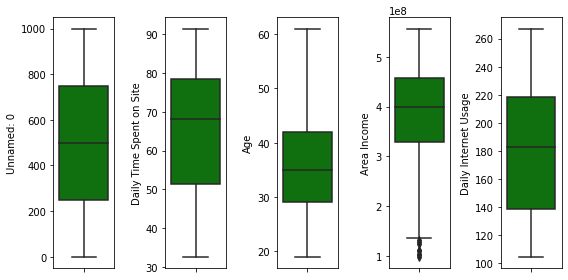

In [ ]:
#Analysis Univariate untuk Data Numerical
plt.figure(figsize=(8, 4))
for i in range (0, len(nums)):
  plt.subplot(1, len(nums), i+1)
  sns.boxplot(y = df[nums[i]], color = 'green', orient = 'v')
  plt.tight_layout()

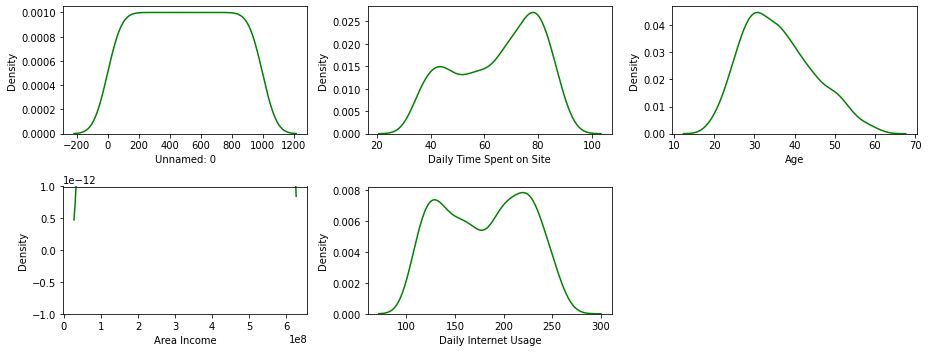

In [ ]:
plt.figure(figsize=(13, 5))
for i in range(0, len(nums)):
  plt.subplot(2 , 3 , i+1)
  sns.kdeplot(x = df[nums[i]], color = 'green')
  plt.xlabel(nums[i])
  plt.tight_layout()

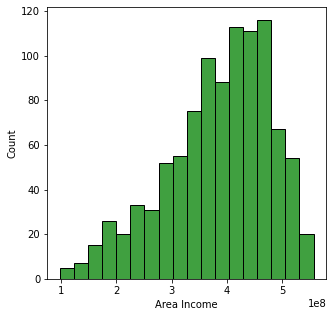

In [ ]:
plt.figure(figsize=(5, 5))
sns.histplot(x = df['Area Income'], color = 'green');

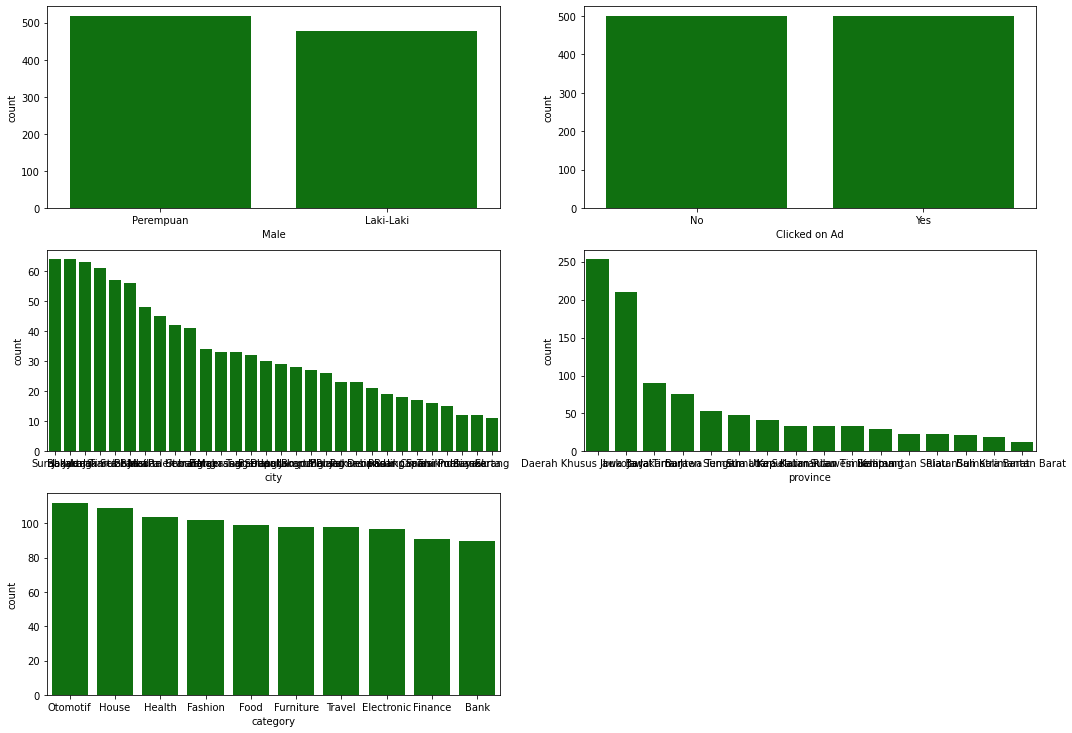

In [ ]:
# Univariate Analysis untuk Data Kategorical
plt.figure(figsize=(15, 20))
for i in range(0, len(cats)):
  plt.subplot(6, 2, i+1)
  sns.countplot(x = df[cats[i]], order=df[cats[i]].value_counts().index, color = 'green')
  plt.tight_layout()

### Analisis Bivariate

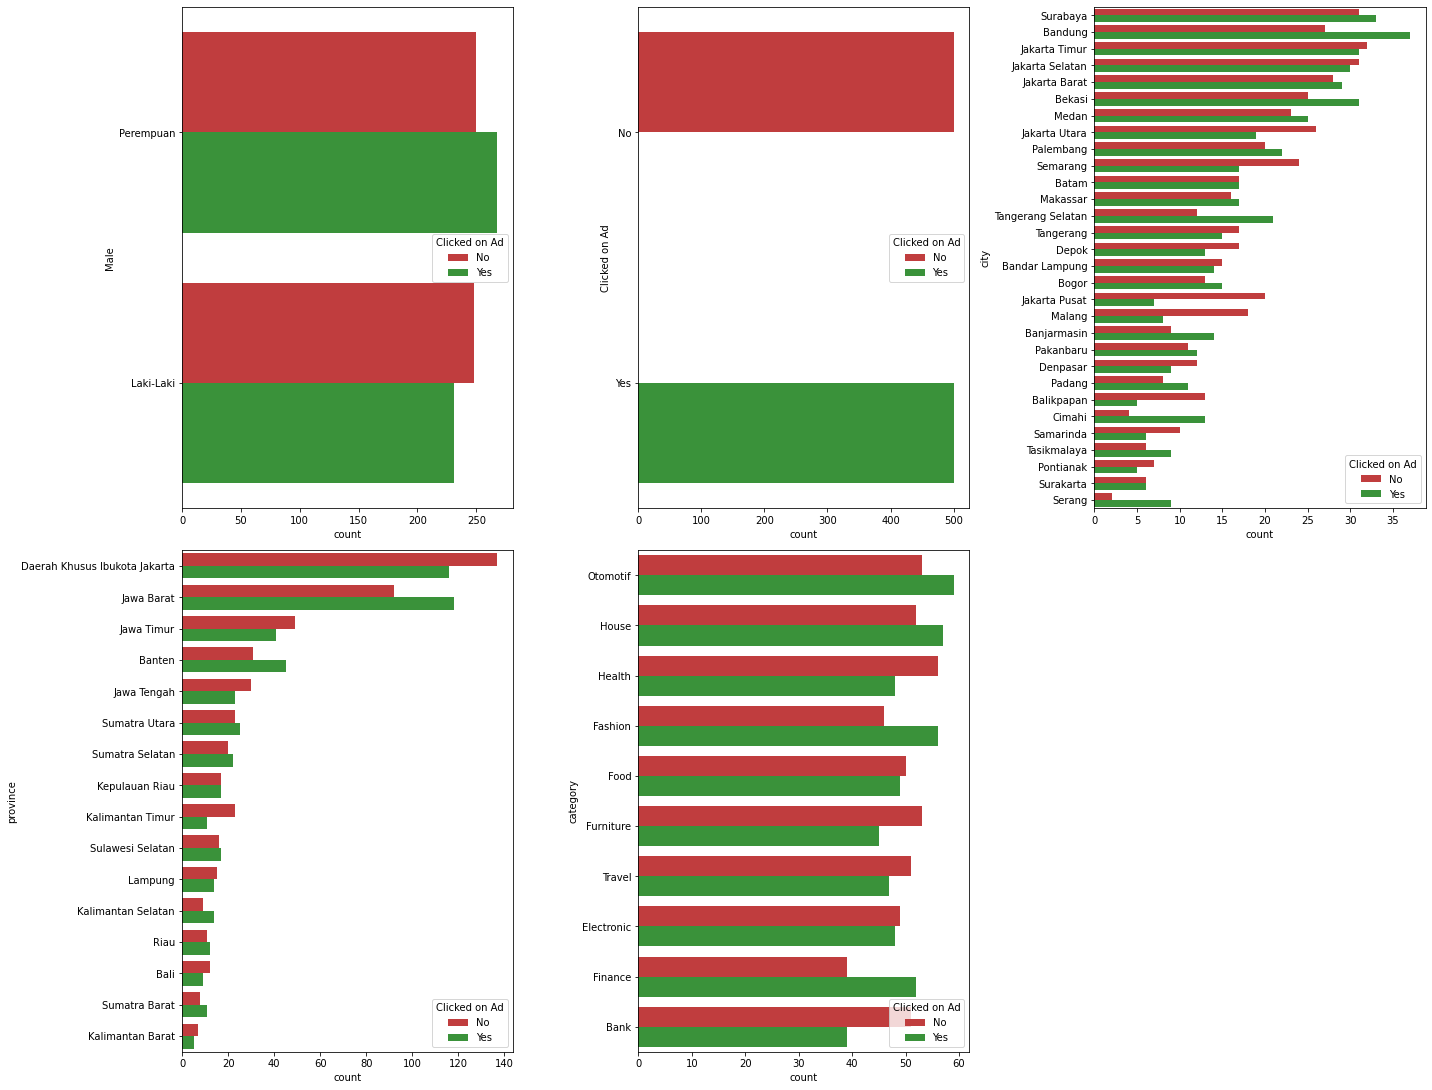

In [ ]:

plt.figure(figsize=(20, 45))
for i in range(0, len(cats)):
    plt.subplot(6, 3, i+1)
    sns.countplot(y = df[cats[i]], order=df[cats[i]].value_counts().index, hue='Clicked on Ad', palette=['tab:red', 'tab:green'], data=df, orient='h')
    plt.tight_layout()
    

### Analisis Multivariate

In [ ]:
df.corr()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
Unnamed: 0,1.000000,-0.032637,0.001835,-0.056862,-0.004842
Daily Time Spent on Site,-0.032637,1.000000,-0.331424,0.308266,0.518294
Age,0.001835,-0.331424,1.000000,-0.179343,-0.370481
Area Income,-0.056862,0.308266,-0.179343,1.000000,0.338080
Daily Internet Usage,-0.004842,0.518294,-0.370481,0.338080,1.000000


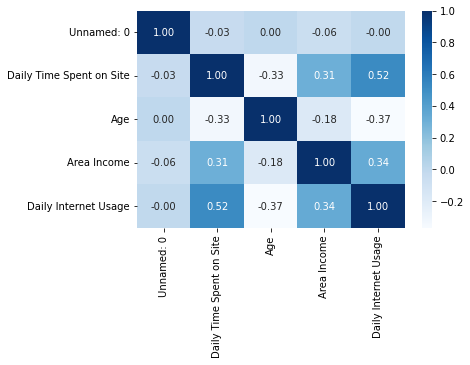

In [ ]:
sns.heatmap(df.corr(), cmap = 'Blues', annot = True, fmt = '.2f');

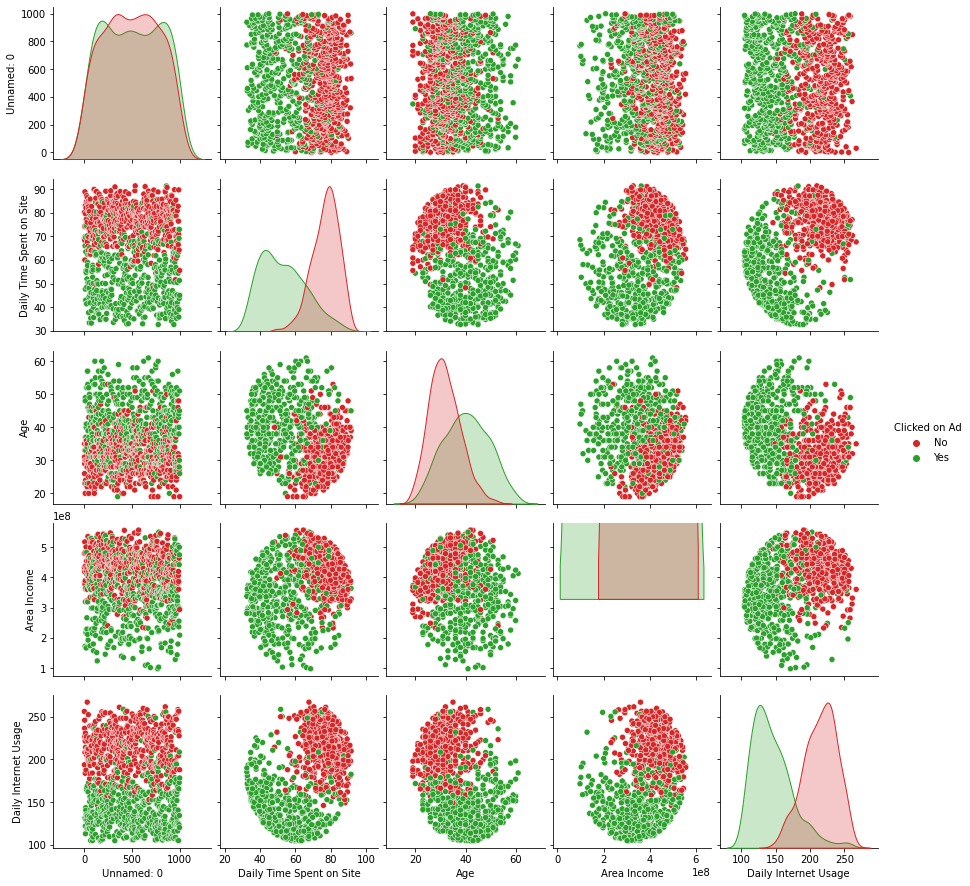

In [ ]:
sns.pairplot(df, diag_kind = 'kde', palette=['tab:red', 'tab:green'], hue = 'Clicked on Ad')

In [ ]:
pip install ppscore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13166 sha256=958fb515380ab229c7496008054a3e6fe03b92cc25192183c6bfa69f0968311d
  Stored in directory: /root/.cache/pip/wheels/5c/80/75/b631985b161d4a29cc0cf94b5f64b00be6297b0968ff1337ce
Successfully built ppscore


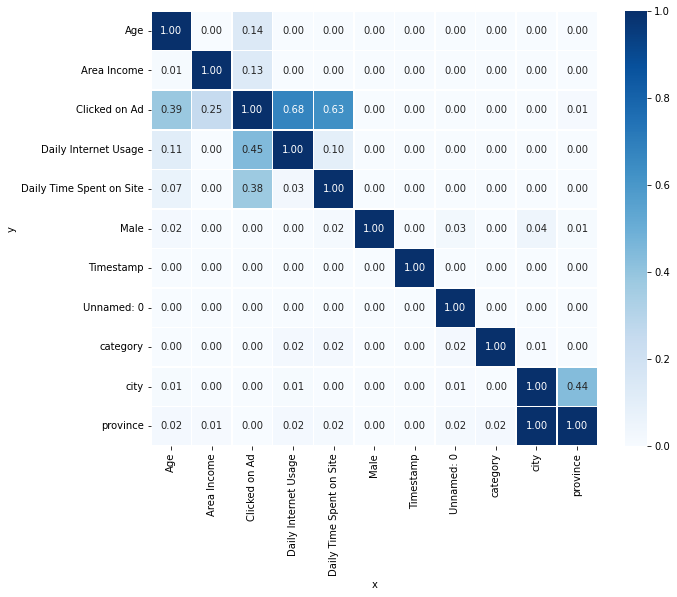

In [ ]:
# melihat korelasi antar kolom numerik dan kategorikal
import ppscore as pps
df_pps = pps.matrix (df)
matrix_df = df_pps[['x','y','ppscore']].pivot(columns='x',index='y', values='ppscore')
plt.figure(figsize=(10, 8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", fmt='.2f',linewidths=0.5, annot=True);


- Daily Time Spent on Site: Lamanya tinggal disuatu situs (harian) dalam satuan menit
- Age: Umur user dalam satuan tahun
- Area Income: Pendapatan user dalam satuan rupiah
- Daily Internet Usage: Penggunaan internet harian dalam satuan menit
- Male: Gender user
- Timestamp: Kapan user visit sebuah situs
- Clicked on Ad: Click atau tidak iklan yang ditampilkan
- city: Kota asal user
- province: Provinsi asal user
- category: Kategori product yang dikunjungi

# Task 2 : Data Preprocessing

## Handling Null Value

In [ ]:
df.shape

(1000, 11)

In [ ]:
df.isna().sum()

Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

Terdapat 4 kolom yang memiliki null value : 
- Daily Time Spent on Site
- Area Income
- Daily Internet Usage
- Male

### Daily Time Spent on Site

In [ ]:
df['Daily Time Spent on Site'].value_counts()

84.53    3
75.55    3
78.76    3
77.05    3
62.26    3
        ..
61.09    1
65.77    1
37.87    1
60.91    1
45.01    1
Name: Daily Time Spent on Site, Length: 890, dtype: int64

In [ ]:
df['Daily Time Spent on Site'].sum()

64085.44

In [ ]:
df['Daily Time Spent on Site'].isna().sum()

13

In [ ]:
df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].median(), inplace=True)

In [ ]:
df['Daily Time Spent on Site'].sum()

64970.87

In [ ]:
df['Daily Time Spent on Site'].isna().sum()

0

### Area Income

In [ ]:
df['Area Income'].sum()

379861429920.0

In [ ]:
df['Area Income'].isna().sum()

13

In [ ]:
df['Area Income'].fillna(df['Area Income'].median(), inplace=True)

In [ ]:
df['Area Income'].sum()

385049318080.0

In [ ]:
df['Area Income'].isna().sum()

0

### Daily Internet Usage

In [ ]:
df['Daily Internet Usage'].sum()

177885.12

In [ ]:
df['Daily Internet Usage'].isna().sum()

11

In [ ]:
df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].median(), inplace=True)

In [ ]:
df['Daily Internet Usage'].sum()

179894.27

In [ ]:
df['Daily Internet Usage'].isna().sum()

0

### Male

In [ ]:
df.Male.value_counts()

Perempuan    518
Laki-Laki    479
Name: Male, dtype: int64

In [ ]:
df.Male.isna().sum()

3

In [ ]:
df['Male'].fillna(df['Male'].mode()[0], inplace=True)


In [ ]:
df.Male.value_counts()

Perempuan    521
Laki-Laki    479
Name: Male, dtype: int64

In [ ]:
df.Male.isna().sum()

0

### Handling Null value- Recap

In [ ]:
df.isna().sum()

Unnamed: 0                  0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
dtype: int64

## Duplicated Value

In [ ]:
df.duplicated().sum()

0

## Ekstraksi Waktu

In [ ]:
# import library datetime
from datetime import datetime
df['date'] = pd.to_datetime(df['Timestamp'])

In [ ]:
#ekstrak tahun, bulan, minggu, dan hari
df['year']=(df['date'].dt.strftime('%Y'))

In [ ]:
df['month']=(df['date'].dt.strftime('%m'))

In [ ]:
df['week']=(df['date'].dt.strftime('%U'))

In [ ]:
df['day']=(df['date'].dt.strftime('%w'))
#0=Sunday , 1=Monday, 2=Tuesday, 3=Wednesday, 4= Thursday, 5=Friday, 6=Saturday

In [ ]:
#ubah ke numerik
df['year'] = pd.to_numeric(df['year'])
df['month'] = pd.to_numeric(df['month'])
df['day'] = pd.to_numeric(df['day'])
df['week'] = pd.to_numeric(df['week']) 

### Data Visualisasi hubungan Clicked on Ad dan Month, Week, Day

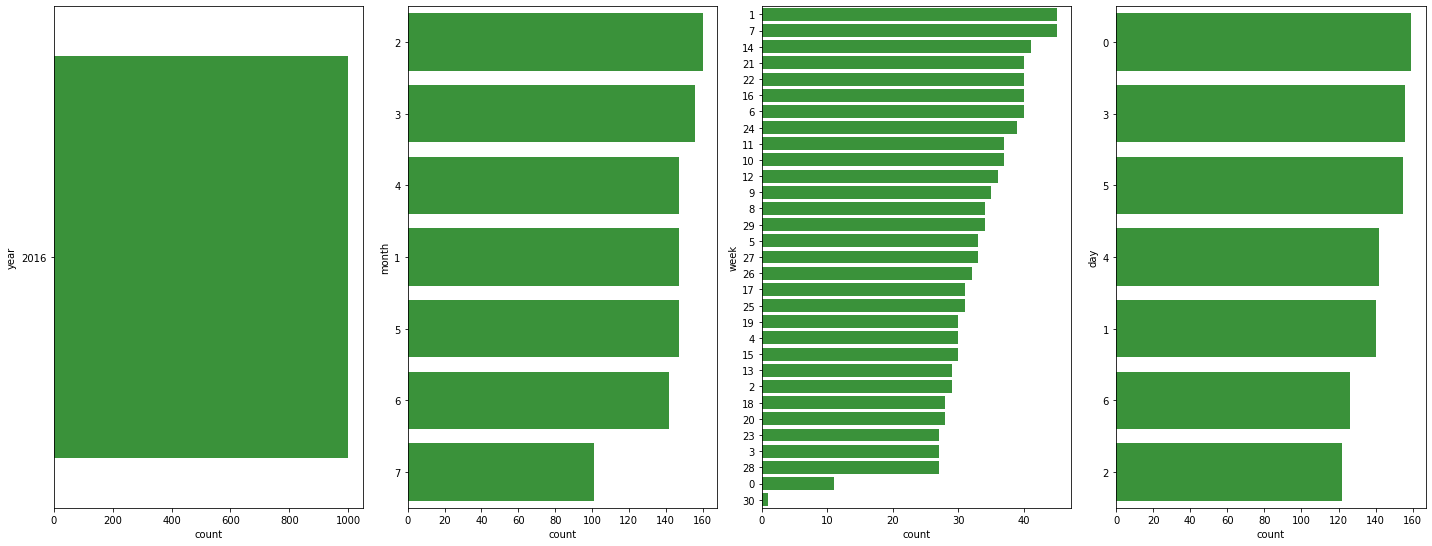

In [ ]:
#data visualisasi
cats2=['year','month','week','day']
plt.figure(figsize=(20, 45))
for i in range(0, len(cats2)):
    plt.subplot(6, 4, i+1)
    sns.countplot(y = df[cats2[i]], order=df[cats2[i]].value_counts().index, palette=['tab:green'],data=df, orient='h')
    plt.tight_layout()

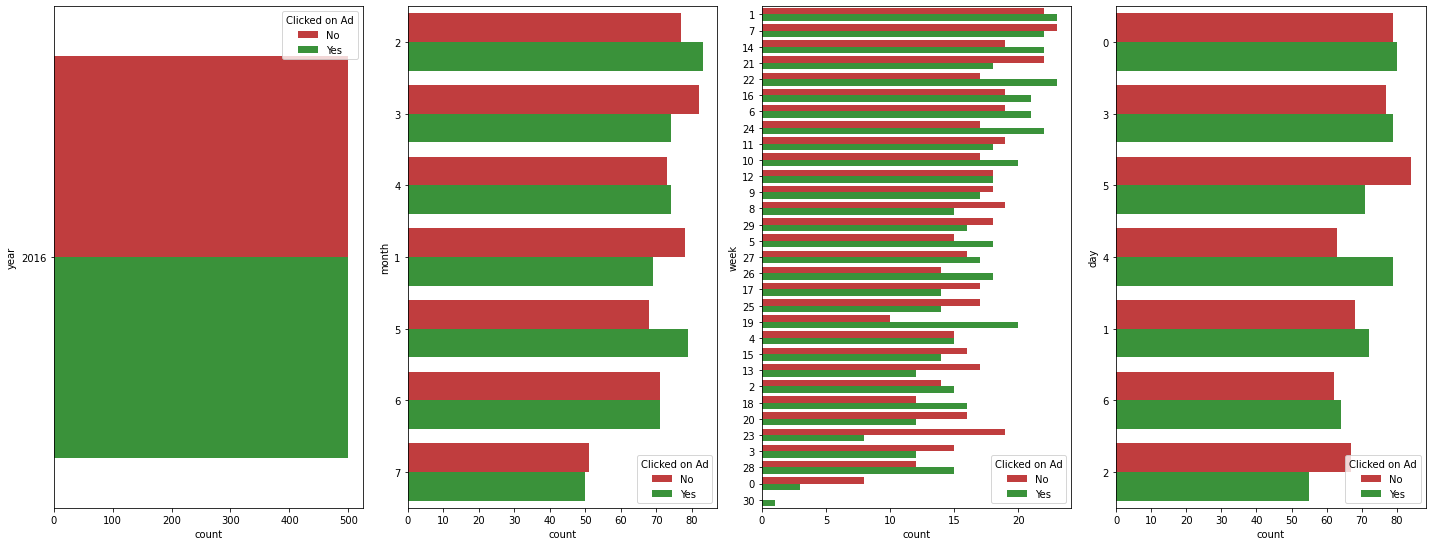

In [ ]:
cats2=['year','month','week','day']
plt.figure(figsize=(20, 45))
for i in range(0, len(cats2)):
    plt.subplot(6, 4, i+1)
    sns.countplot(y = df[cats2[i]], order=df[cats2[i]].value_counts().index, hue='Clicked on Ad',palette=['tab:red','tab:green'],data=df, orient='h')
    plt.tight_layout()

In [ ]:
df1=df.groupby (['month','Clicked on Ad'])['Clicked on Ad'].agg({'count'}).reset_index()
df1

,month,Clicked on Ad,count
0,1,No,78
1,1,Yes,69
2,2,No,77
3,2,Yes,83
4,3,No,82
5,3,Yes,74
6,4,No,73
7,4,Yes,74
8,5,No,68
9,5,Yes,79


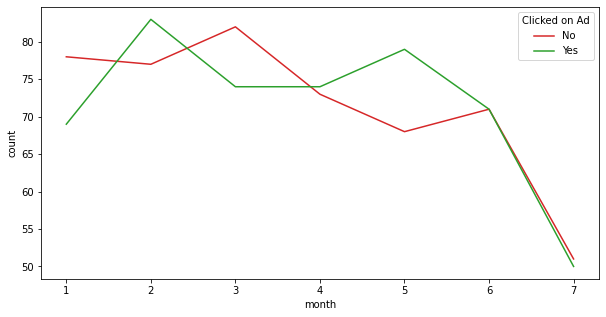

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="month", y ='count', hue = 'Clicked on Ad', palette=['tab:red','tab:green'],data=df1);

In [ ]:
df2=df.groupby (['week','Clicked on Ad'])['Clicked on Ad'].agg({'count'}).reset_index()
df2

,week,Clicked on Ad,count
0,0,No,8
1,0,Yes,3
2,1,No,22
3,1,Yes,23
4,2,No,14
...,...,...,...
56,28,No,12
57,28,Yes,15
58,29,No,18
59,29,Yes,16


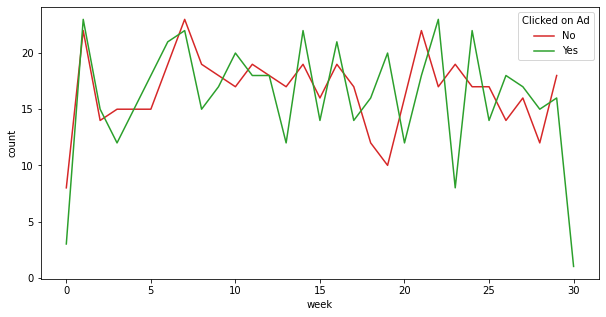

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="week", y ='count', hue = 'Clicked on Ad',palette=['tab:red','tab:green'], data=df2);

In [ ]:
df3=df.groupby (['day','Clicked on Ad'])['Clicked on Ad'].agg({'count'}).reset_index()
df3

,day,Clicked on Ad,count
0,0,No,79
1,0,Yes,80
2,1,No,68
3,1,Yes,72
4,2,No,67
5,2,Yes,55
6,3,No,77
7,3,Yes,79
8,4,No,63
9,4,Yes,79


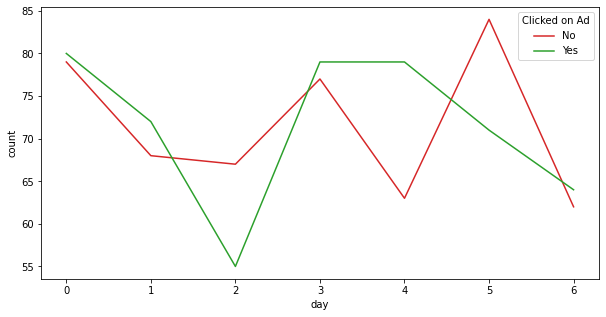

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="day", y ='count', hue = 'Clicked on Ad', palette=['tab:red','tab:green'], data=df3);

## Label One Hot Encoding

In [ ]:
df_encode=df.copy() 
one_hot_cats=df_encode[['Male','city', 'province','category']]
one_hot=pd.get_dummies(one_hot_cats)

In [ ]:
df = df.join(one_hot)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 74 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Unnamed: 0                              1000 non-null   int64         
 1   Daily Time Spent on Site                1000 non-null   float64       
 2   Age                                     1000 non-null   int64         
 3   Area Income                             1000 non-null   float64       
 4   Daily Internet Usage                    1000 non-null   float64       
 5   Male                                    1000 non-null   object        
 6   Timestamp                               1000 non-null   object        
 7   Clicked on Ad                           1000 non-null   object        
 8   city                                    1000 non-null   object        
 9   province                                1000 non-null

## Clicked on Ad

In [ ]:
df['Clicked on Ad Label'] = np.where(df['Clicked on Ad'] == 'Yes',1,0)

In [ ]:
df.tail(5)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,...,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel,Clicked on Ad Label
995,995,72.97,30,499691990.0,208.58,Laki-Laki,2/11/2016 21:49,Yes,Semarang,Jawa Tengah,...,0,0,1,0,0,0,0,0,0,1
996,996,51.30,45,474475190.0,134.42,Laki-Laki,4/22/2016 2:07,Yes,Pakanbaru,Riau,...,1,0,0,0,0,0,0,0,0,1
997,997,68.11,51,296910040.0,120.37,Laki-Laki,2/1/2016 17:24,Yes,Samarinda,Kalimantan Timur,...,0,0,0,0,0,0,0,0,1,1
998,998,55.55,19,293445530.0,187.95,Perempuan,3/24/2016 2:35,No,Tangerang,Banten,...,0,0,0,0,0,0,0,0,0,0
999,999,45.01,26,209130600.0,178.35,Perempuan,6/3/2016 21:43,Yes,Serang,Banten,...,0,0,0,0,0,0,0,0,1,1


## Dropping Feature

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 75 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Unnamed: 0                              1000 non-null   int64         
 1   Daily Time Spent on Site                1000 non-null   float64       
 2   Age                                     1000 non-null   int64         
 3   Area Income                             1000 non-null   float64       
 4   Daily Internet Usage                    1000 non-null   float64       
 5   Male                                    1000 non-null   object        
 6   Timestamp                               1000 non-null   object        
 7   Clicked on Ad                           1000 non-null   object        
 8   city                                    1000 non-null   object        
 9   province                                1000 non-null

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 75 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Unnamed: 0                              1000 non-null   int64         
 1   Daily Time Spent on Site                1000 non-null   float64       
 2   Age                                     1000 non-null   int64         
 3   Area Income                             1000 non-null   float64       
 4   Daily Internet Usage                    1000 non-null   float64       
 5   Male                                    1000 non-null   object        
 6   Timestamp                               1000 non-null   object        
 7   Clicked on Ad                           1000 non-null   object        
 8   city                                    1000 non-null   object        
 9   province                                1000 non-null

In [ ]:
df = df.drop(columns = ['Unnamed: 0','Male','Timestamp',
                        'city','province','Clicked on Ad','category','date']) #drop fitur

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 67 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Daily Time Spent on Site                1000 non-null   float64
 1   Age                                     1000 non-null   int64  
 2   Area Income                             1000 non-null   float64
 3   Daily Internet Usage                    1000 non-null   float64
 4   year                                    1000 non-null   int64  
 5   month                                   1000 non-null   int64  
 6   week                                    1000 non-null   int64  
 7   day                                     1000 non-null   int64  
 8   Male_Laki-Laki                          1000 non-null   uint8  
 9   Male_Perempuan                          1000 non-null   uint8  
 10  city_Balikpapan                         1000 non-null   uint8

# Task 3 : Data Modelling

Hal yang dilakukan:
1. Split Data Train dan Data Set 70:30
2. Buat 2 Variabel pada data Train:
    - Data Train yang tidak dilakukan normalisasi (scaler)--> 2a
    - Data Train yang dilakukan normalisasi (scaler) --> 2b
3. Di modelling dengan 5 pemodelan
    - 5 model untuk 2a
    - 5 model untuk 2b
4. Lakukan evaluasi


## Split Data Train dan Data Test

Data displit menjadi 2 : Data Fitur dan Data Target,
kemudian dibagi lagi menjadi data Data Train dan Test 7:3

In [ ]:
df_model = df

In [ ]:
#Fitur dan target dipisah dalam variabel X dan y
X = df_model.drop(columns=['Clicked on Ad Label'])
y = pd.Series(df_model['Clicked on Ad Label'])

In [ ]:
# X dan y dibagi untuk data train dan test sesuai random 7:3
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
y.value_counts()

0    500
1    500
Name: Clicked on Ad Label, dtype: int64

In [ ]:
# Untuk dihandling scaler dan outlier
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 66)
(300, 66)
(700,)
(300,)


In [ ]:
y_train.value_counts()

0    354
1    346
Name: Clicked on Ad Label, dtype: int64

In [ ]:
y_test.value_counts()

1    154
0    146
Name: Clicked on Ad Label, dtype: int64

## Handling Scaler khusus untuk Data Training

Handling Scaler dan Outlier khusus untuk Data Training
(X_train)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

## Metric Evaluation 

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model, xtrain, ytrain, xtest, ytest):
    ypred = model.predict(xtest)
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, ypred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, ypred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, ypred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, ypred))
    
    y_pred_proba = model.predict_proba(xtest)
    print("AUC: %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))
    
    confusion_matrix = metrics.confusion_matrix(ytest, ypred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Click Ad', 'No Click Ad'])
    cm_display.plot()
    plt.show()

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(5, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

## Model 1. Decision Tree

### a. Data Train sebelum discaler

Accuracy (Test Set): 0.93
Precision (Test Set): 0.94
Recall (Test Set): 0.93
F1-Score (Test Set): 0.93
AUC: 0.93


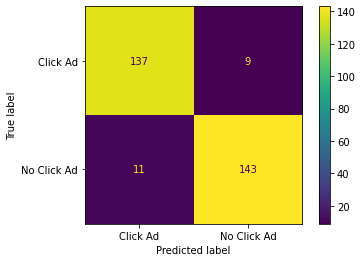

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
eval_classification(dt, X_train, y_train, X_test, y_test)

In [ ]:
print('Train score: ' + str(dt.score(X_train, y_train))) #accuracy
print('Test score: ' + str(dt.score(X_test, y_test))) #accuracy

Train score: 1.0
Test score: 0.9333333333333333


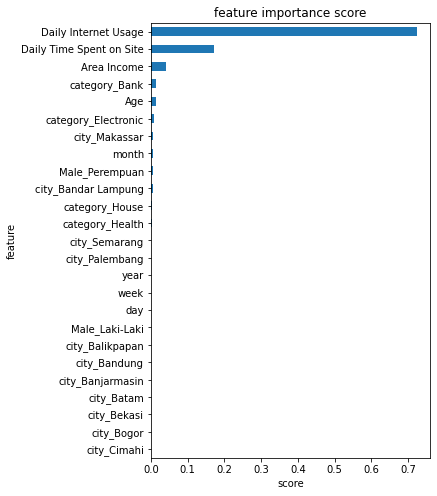

In [ ]:
show_feature_importance(dt)

### b. Data Train sesudah discaler

Accuracy (Test Set): 0.94
Precision (Test Set): 0.95
Recall (Test Set): 0.94
F1-Score (Test Set): 0.94
AUC: 0.94


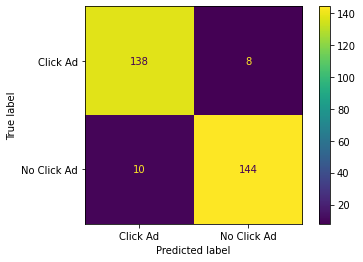

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt2 = DecisionTreeClassifier(random_state=42)
dt2.fit(scaled_X_train,y_train)
eval_classification(dt2, scaled_X_train, y_train, scaled_X_test, y_test)

In [ ]:
print('Train score: ' + str(dt2.score(scaled_X_train, y_train))) #accuracy
print('Test score: ' + str(dt2.score(scaled_X_test, y_test))) #accuracy

Train score: 1.0
Test score: 0.94


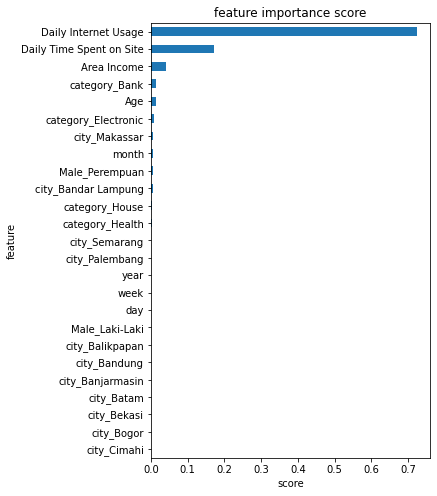

In [ ]:
show_feature_importance(dt2)

## Model 2. Logistic Regression

### a. Data Train sebelum discaler

Accuracy (Test Set): 0.49
Precision (Test Set): 0.00
Recall (Test Set): 0.00
F1-Score (Test Set): 0.00
AUC: 0.73


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


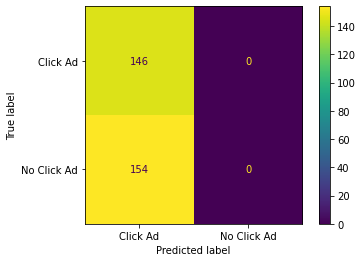

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state=42)
lg.fit(X_train,y_train)
eval_classification(lg, X_train, y_train, X_test, y_test)

In [ ]:
print('Train score: ' + str(lg.score(X_train, y_train))) #accuracy
print('Test score: ' + str(lg.score(X_test, y_test))) #accuracy

Train score: 0.5057142857142857
Test score: 0.4866666666666667


### b. Data Train sesudah discaler

Accuracy (Test Set): 0.95
Precision (Test Set): 0.97
Recall (Test Set): 0.93
F1-Score (Test Set): 0.95
AUC: 0.98


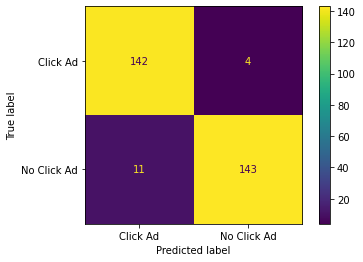

In [ ]:
from sklearn.linear_model import LogisticRegression
lg2 = LogisticRegression(random_state=42)
lg2.fit(scaled_X_train,y_train)
eval_classification(lg2, scaled_X_train, y_train, scaled_X_test, y_test)

In [ ]:
print('Train score: ' + str(lg2.score(scaled_X_train, y_train))) #accuracy
print('Test score: ' + str(lg2.score(scaled_X_test, y_test))) #accuracy

Train score: 0.98
Test score: 0.95


In [ ]:
#show_feature_importance(lg)

AttributeError: ignored

## Model 3. XGBoost

### a. Data Train sebelum discaler

Accuracy (Test Set): 0.95
Precision (Test Set): 0.95
Recall (Test Set): 0.94
F1-Score (Test Set): 0.95
AUC: 0.98


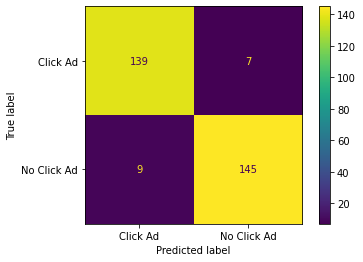

In [ ]:
import xgboost
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(X_train,y_train)
eval_classification(xg, X_train, y_train, X_test, y_test)

In [ ]:
print('Train score: ' + str(xg.score(X_train, y_train))) #accuracy
print('Test score: ' + str(xg.score(X_test, y_test))) #accuracy

Train score: 0.9928571428571429
Test score: 0.9466666666666667


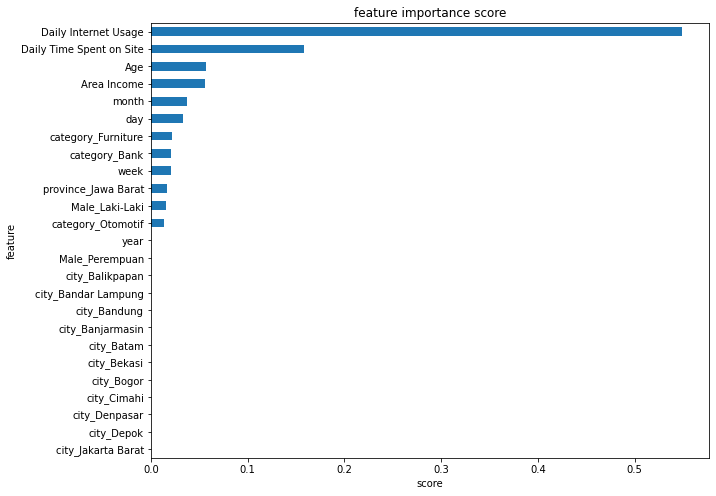

In [ ]:
show_feature_importance(xg)

### b. Data Train sesudah discaler

Accuracy (Test Set): 0.95
Precision (Test Set): 0.96
Recall (Test Set): 0.94
F1-Score (Test Set): 0.95
AUC: 0.98


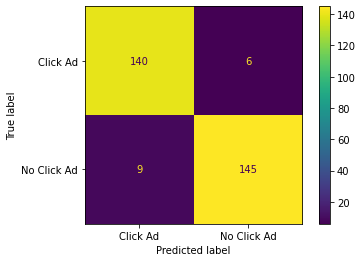

In [ ]:
import xgboost
from xgboost import XGBClassifier
xg2 = XGBClassifier(random_state=42)
xg2.fit(scaled_X_train,y_train)
eval_classification(xg2, scaled_X_train, y_train, scaled_X_test, y_test)

In [ ]:
print('Train score: ' + str(xg2.score(scaled_X_train, y_train))) #accuracy
print('Test score: ' + str(xg2.score(scaled_X_test, y_test))) #accuracy

Train score: 0.9928571428571429
Test score: 0.95


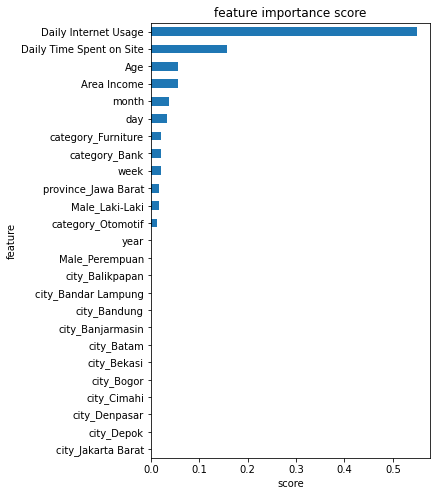

In [ ]:
show_feature_importance(xg2)

## Model 4. AdaBoost Classifier

### a. Data Train sebelum discaler

Accuracy (Test Set): 0.96
Precision (Test Set): 0.98
Recall (Test Set): 0.95
F1-Score (Test Set): 0.96
AUC: 0.98


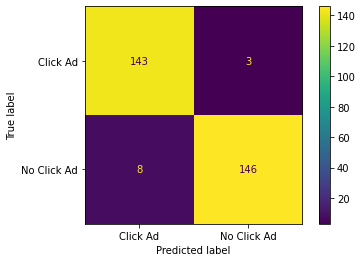

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn import metrics

abc = AdaBoostClassifier(n_estimators=50, learning_rate=1) # Create adaboost classifer object
abc.fit(X_train,y_train) # Train Adaboost Classifer
eval_classification(abc, X_train, y_train, X_test, y_test)

In [ ]:
print('Train score: ' + str(abc.score(X_train, y_train))) #accuracy
print('Test score: ' + str(abc.score(X_test, y_test))) #accuracy

Train score: 0.9957142857142857
Test score: 0.9633333333333334


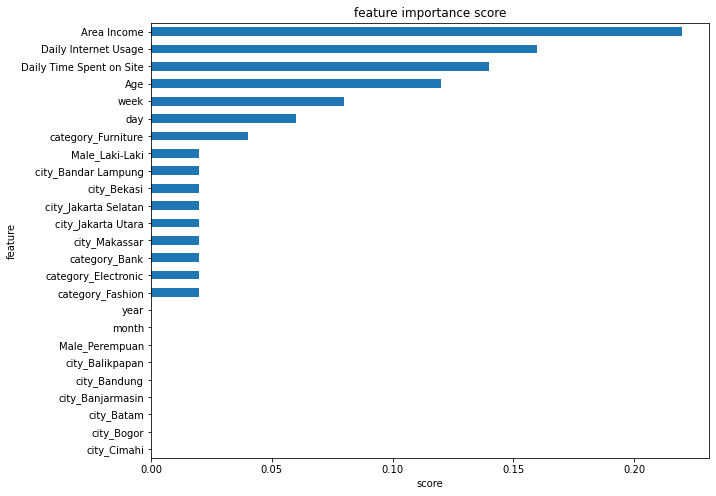

In [ ]:
show_feature_importance(abc)

### b. Data Train sesudah discaler

Accuracy (Test Set): 0.96
Precision (Test Set): 0.97
Recall (Test Set): 0.95
F1-Score (Test Set): 0.96
AUC: 0.99


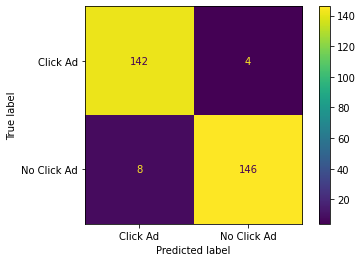

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn import metrics

abc2 = AdaBoostClassifier(n_estimators=50, learning_rate=1) # Create adaboost classifer object
abc2.fit(scaled_X_train,y_train) # Train Adaboost Classifer
eval_classification(abc2, scaled_X_train, y_train, scaled_X_test, y_test)

In [ ]:
print('Train score: ' + str(abc2.score(scaled_X_train, y_train))) #accuracy
print('Test score: ' + str(abc2.score(scaled_X_test, y_test))) #accuracy

Train score: 0.9957142857142857
Test score: 0.96


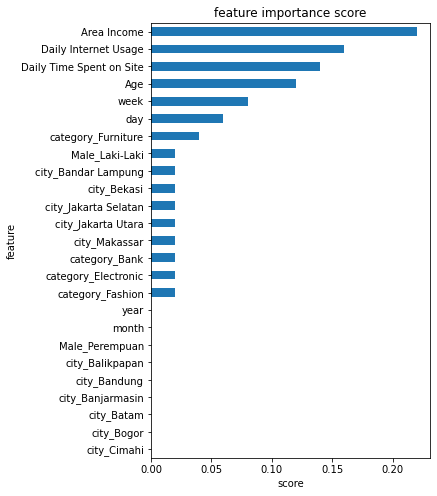

In [ ]:
show_feature_importance(abc2)

## Model 5. Random Forest

### a. Data Train sebelum discaler

Accuracy (Test Set): 0.95
Precision (Test Set): 0.94
Recall (Test Set): 0.95
F1-Score (Test Set): 0.95
AUC: 0.98


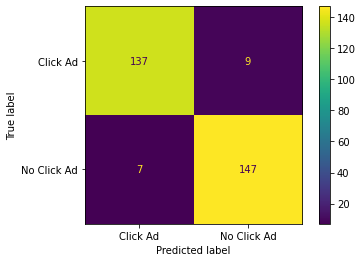

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
eval_classification(rf, X_train, y_train, X_test, y_test)

In [ ]:
print('Train score: ' + str(rf.score(X_train, y_train))) #accuracy
print('Test score: ' + str(rf.score(X_test, y_test))) #accuracy

Train score: 1.0
Test score: 0.9466666666666667


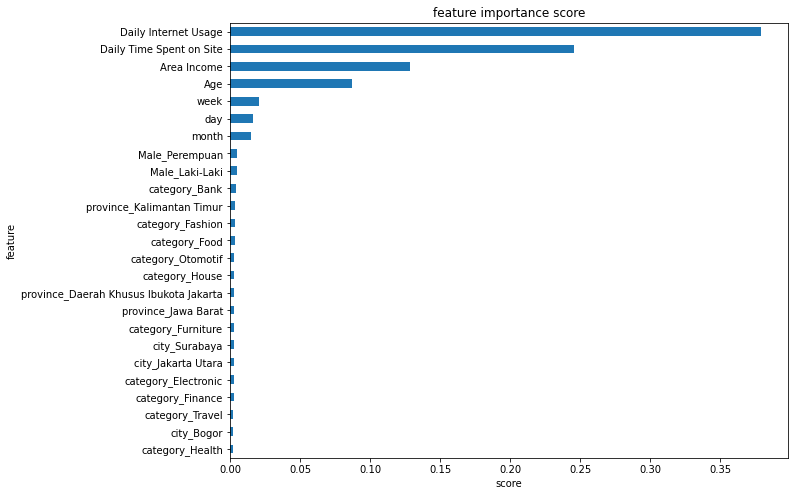

In [ ]:
show_feature_importance(rf)

### a. Data Train sesudah discaler

Accuracy (Test Set): 0.96
Precision (Test Set): 0.96
Recall (Test Set): 0.95
F1-Score (Test Set): 0.96
AUC: 0.98


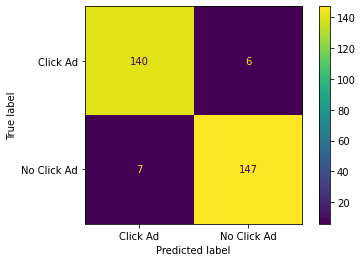

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier()
rf2.fit(scaled_X_train, y_train)
eval_classification(rf2, scaled_X_train, y_train, scaled_X_test, y_test)

In [ ]:
print('Train score: ' + str(rf2.score(scaled_X_train, y_train))) #accuracy
print('Test score: ' + str(rf2.score(scaled_X_test, y_test))) #accuracy

Train score: 0.4942857142857143
Test score: 0.5133333333333333


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


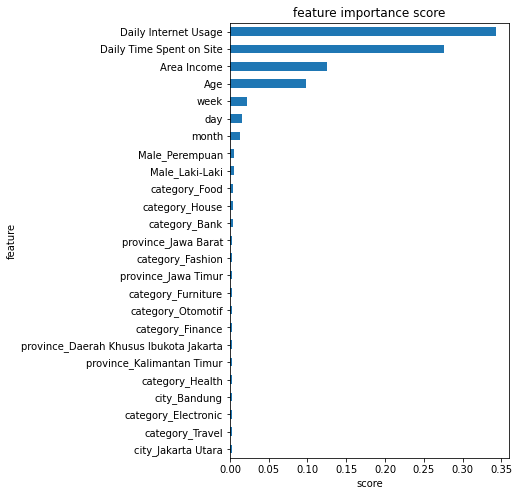

In [ ]:
show_feature_importance(rf2)

## Model 6. Gradient Boosting Classifier

### a. Data Train sebelum discaler

Accuracy (Test Set): 0.95
Precision (Test Set): 0.95
Recall (Test Set): 0.95
F1-Score (Test Set): 0.95
AUC: 0.98


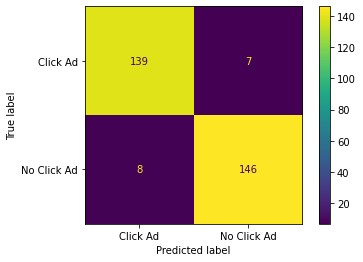

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
eval_classification(gbc, X_train, y_train, X_test, y_test)

In [ ]:
print('Train score: ' + str(gbc.score(X_train, y_train))) #accuracy
print('Test score: ' + str(gbc.score(X_test, y_test))) #accuracy

Train score: 1.0
Test score: 0.95


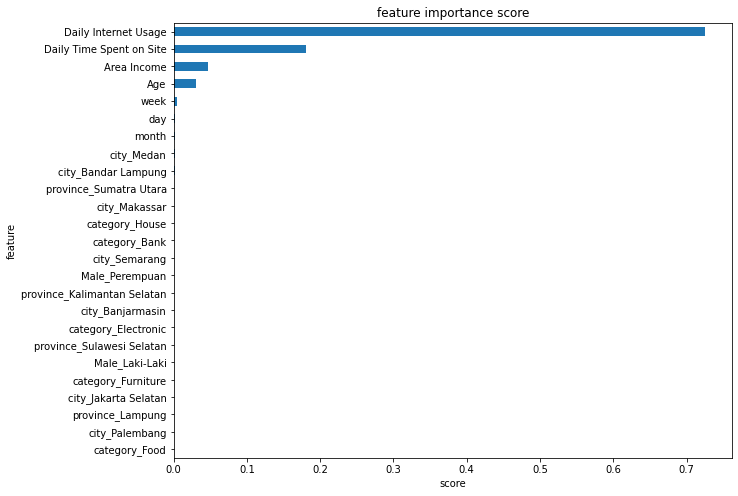

In [ ]:
show_feature_importance(gbc)

### b. Data Train sesudah discaler

Accuracy (Test Set): 0.95
Precision (Test Set): 0.97
Recall (Test Set): 0.94
F1-Score (Test Set): 0.95
AUC: 0.98


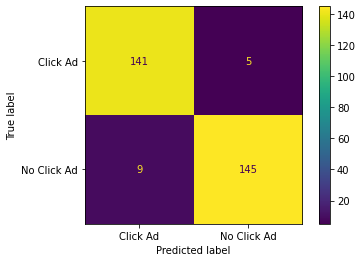

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc2 = GradientBoostingClassifier()
gbc2.fit(scaled_X_train, y_train)
eval_classification(gbc2, scaled_X_train, y_train, scaled_X_test, y_test)

In [ ]:
print('Train score: ' + str(gbc2.score(scaled_X_train, y_train))) #accuracy
print('Test score: ' + str(gbc2.score(scaled_X_test, y_test))) #accuracy

Train score: 1.0
Test score: 0.9533333333333334


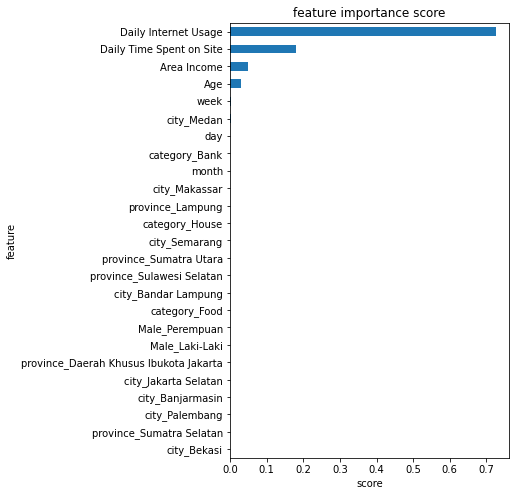

In [ ]:
show_feature_importance(gbc2)

## Model 7. K-Nearest Neighboors Clasifier

### a. Data Train sebelum discaler

Accuracy (Test Set): 0.68
Precision (Test Set): 0.71
Recall (Test Set): 0.64
F1-Score (Test Set): 0.67
AUC: 0.70


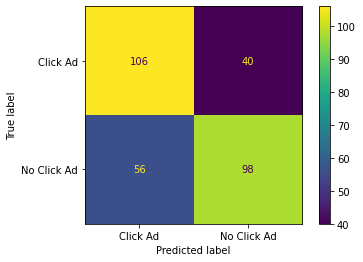

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(X_train, y_train) # fit model KNN dari data train
eval_classification(knn, X_train, y_train, X_test, y_test)

In [ ]:
print('Train score: ' + str(knn.score(X_train, y_train))) #accuracy
print('Test score: ' + str(knn.score(X_test, y_test))) #accuracy

Train score: 0.78
Test score: 0.68


### b. Data Train sesudah discaler

Accuracy (Test Set): 0.81
Precision (Test Set): 0.86
Recall (Test Set): 0.75
F1-Score (Test Set): 0.80
AUC: 0.88


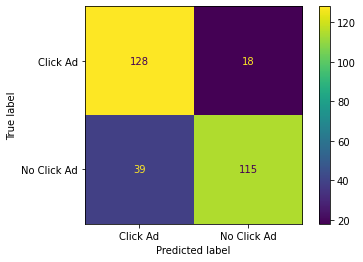

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn2 = KNeighborsClassifier() # inisiasi object dengan nama knn
knn2.fit(scaled_X_train, y_train) # fit model KNN dari data train
eval_classification(knn2, scaled_X_train, y_train, scaled_X_test, y_test)

In [ ]:
print('Train score: ' + str(knn2.score(scaled_X_train, y_train))) #accuracy
print('Test score: ' + str(knn2.score(scaled_X_test, y_test))) #accuracy

Train score: 0.8742857142857143
Test score: 0.81


# Task 4 : Business Recommendation and Simulation

Accuracy (Test Set): 0.95
Precision (Test Set): 0.97
Recall (Test Set): 0.94
F1-Score (Test Set): 0.95
AUC: 0.98


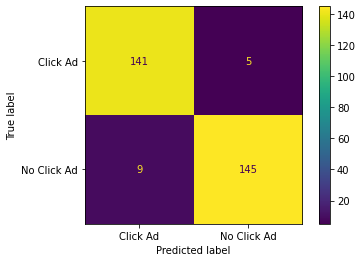

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc2 = GradientBoostingClassifier()
gbc2.fit(scaled_X_train, y_train)
eval_classification(gbc2, scaled_X_train, y_train, scaled_X_test, y_test)

In [ ]:
print('Train score: ' + str(gbc2.score(scaled_X_train, y_train))) #accuracy
print('Test score: ' + str(gbc2.score(scaled_X_test, y_test))) #accuracy

Train score: 1.0
Test score: 0.9533333333333334


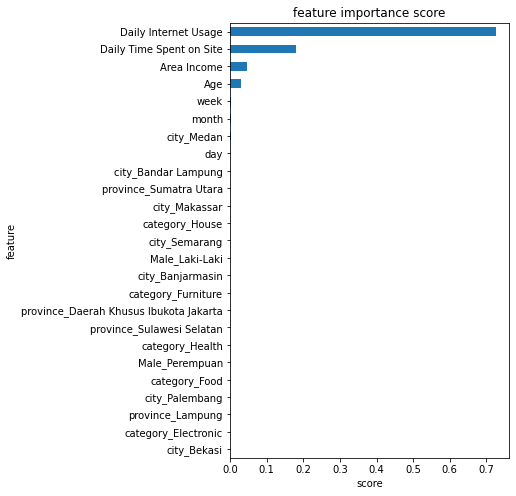

In [ ]:
show_feature_importance(gbc2)

biaya pemasaran dari data luar, pengiklanan untuk 1 kali. 
simulasi 1 tanpa ML : contohnya 100 klik, 100 no klik
kalau 200 semua ditembak iklan
kalau sesudah ML, iklan hanya untuk org tertentu saja